<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Model_Arima(PlasticSales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving PlasticSales.csv to PlasticSales.csv


In [2]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
series = read_csv('PlasticSales.csv', header=0, index_col=0, parse_dates=True)

In [4]:
series

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030
2049-06-01,1107
2049-07-01,1165
2049-08-01,1216
2049-09-01,1208


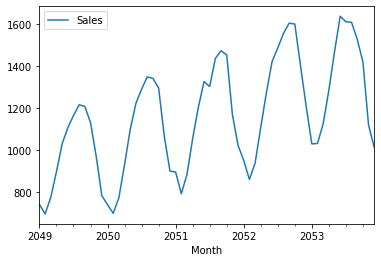

In [5]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae1ab5e8d0>]],
      dtype=object)

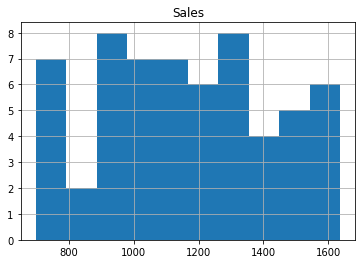

In [6]:
series.hist()

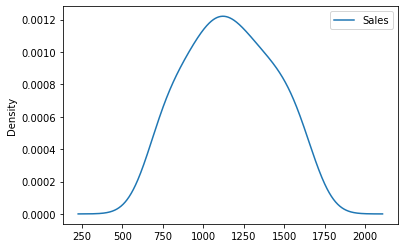

In [7]:
series.plot(kind='kde')

In [9]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2049-01-01 to 2053-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [11]:

# separate out a validation dataset
dataset = series.head(50)
validation = series.tail(10)
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 50, Validation 10


#### Persistence/ Base model

In [12]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [13]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=896.000, Expected=793.000
>Predicted=793.000, Expected=885.000
>Predicted=885.000, Expected=1055.000
>Predicted=1055.000, Expected=1204.000
>Predicted=1204.000, Expected=1326.000
>Predicted=1326.000, Expected=1303.000
>Predicted=1303.000, Expected=1436.000
>Predicted=1436.000, Expected=1473.000
>Predicted=1473.000, Expected=1453.000
>Predicted=1453.000, Expected=1170.000
>Predicted=1170.000, Expected=1023.000
>Predicted=1023.000, Expected=951.000
>Predicted=951.000, Expected=861.000
>Predicted=861.000, Expected=938.000
>Predicted=938.000, Expected=1109.000
>Predicted=1109.000, Expected=1274.000
>Predicted=1274.000, Expected=1422.000
>Predicted=1422.000, Expected=1486.000
>Predicted=1486.000, Expected=1555.000
>Predicted=1555.000, Expected=1604.000
>Predicted=1604.000, Expected=1600.000
>Predicted=1600.000, Expected=1403.000
>Predicted=1403.000, Expected=1209.000
>Predicted=1209.000, Expected=1030.000
>Predicted=1030.000, Expected=1032.000
RMSE: 130.244


#### ARIMA Hyperparameters

In [14]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
#def evaluate_arima_model(X, arima_order):
# prepare training dataset
#    X = X.astype('float32')
 #   train_size = int(len(X) * 0.50)
  #  train, test = X[0:train_size], X[train_size:]
   # history = [x for x in train]
# make predictions
    #predictions = list()
    #for t in range(len(test)):
     #   model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
      #  model_fit = model.fit(disp=0)
       # yhat = model_fit.forecast()[0]
        #predictions.append(yhat)
       # history.append(test[t])
# calculate out of sample error
   # rmse = sqrt(mean_squared_error(test, predictions))
    #return rmse

In [28]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
model=ARIMA(train,order=(3,0,2)).fit(disp=0)
pred=model.forecast(steps=35)[0]
pred

rmse_arima = sqrt(mean_squared_error(test, predictions))
rmse_arima

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:225: RuntimeWarning: invalid value encountered in true_divide
  Z_mat.astype(complex), R_mat, T_mat)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountere

130.24438417595977

#### Grid search for p,d,q values

In [29]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [30]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(1, 5)
d_values = range(0, 1)
q_values = range(1, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


#### Build Model based on the optimized values

In [33]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [34]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

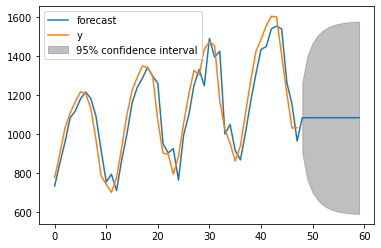

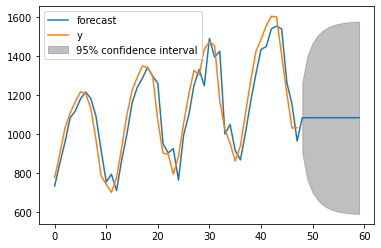

In [37]:
# fit model
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 60)

In [38]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

370.1523781380685

#### Combine train and test data and build final model

In [40]:
# fit model
data = read_csv('PlasticSales.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [41]:
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()

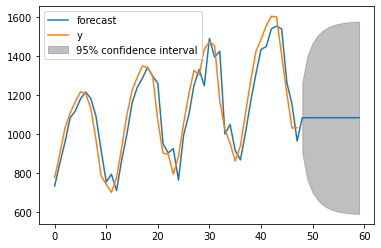

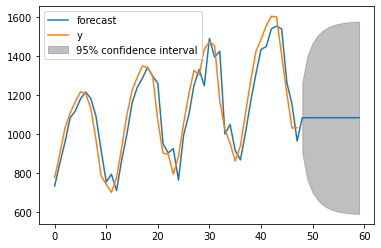

In [42]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,60)

In [43]:
pd.DataFrame(forecast)

,0
0,1082.806325
1,1082.864493
2,1082.912544
3,1082.952238
4,1082.985029
5,1083.012117
6,1083.034493
7,1083.052978
8,1083.068248
9,1083.080863
